In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ALE(probability: float, impact: float, years: int=1) -> float:
    """ 
    Compute the annualized expected losses with ALE = probability * impact.
    Impact is a monetary value that is greater than zero, and probability
    is a float between 0 and 1 indicating the probability of the impact happening.
    Standard we calculate the ALE for 1 year, but we can also calculate it for more years
    """
    assert 0 <= probability <= 1
    assert 0 <= impact
    assert years >= 1
    
    return probability * impact * years

def RoSI(ALE_0: float, ALE_s: float, cost: float) -> float:
    """
    Calculate the Return on Security investment (RoSI), where
    RoSI = (ALE_0 - ALE_s - cost) / cost
    and where ALE_0, ALE_s and cost are positive values
    """
    return (ALE_0 - ALE_s - cost) / cost

def cost(direct_cost: float, indirect_cost: float, shared_by: int) -> float:
    """
    Calculate the cost that is used by the RoSI calculation, where 
    cost = (Direct cost - Indirect cost) / Amount of parties that share the costs
    """
    return (direct_cost + indirect_cost) / shared_by

In [3]:
ALE_0 = ALE(237*1.0/770000, 1.00*1800000, 1)
ALE_s = ALE(237*0.95/770000, 0.95*1800000, 1)
print(ALE_s)
solution_cost = cost(2400000, 8160, 1)

RoSI(ALE_0, ALE_s, solution_cost)

500.0084415584415


-0.9999775689603401

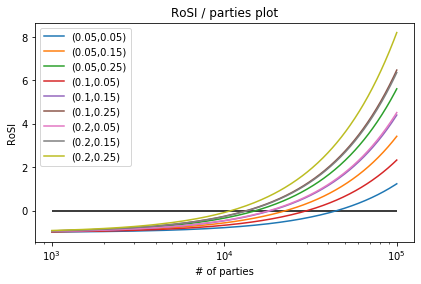

In [4]:
thresholds = [(p, q) for p in [0.95, 0.90, 0.80] for q in [0.95, 0.85, 0.75]]

for p, q in thresholds:

    ALE_0 = ALE(237*1.0/770000, 1.00*1800000, 1)
    ALE_s = ALE(237*p/770000, q*1800000, 1)

    parties = np.linspace(1000, 100000, 200)
    RoSIs = [RoSI(ALE_0, ALE_s, cost(2400000, 8160, int(p))) for p in parties]

    plt.plot(parties, RoSIs, label=f"({round(1-p, 2)},{round(1-q, 2)})")
plt.xlabel("# of parties")
plt.ylabel("RoSI")
plt.title("RoSI / parties plot")
plt.tight_layout()

plt.xscale('log')
plt.hlines([0], parties[0], parties[-1], colors="black")
plt.legend()
plt.savefig("rosi_parties.png", dpi=400)

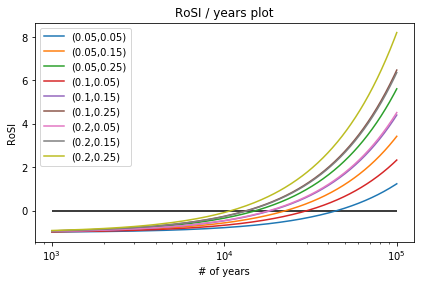

In [5]:
thresholds = [(p, q) for p in [0.95, 0.90, 0.80] for q in [0.95, 0.85, 0.75]]

for p, q in thresholds:

    solution_cost = cost(2400000, 8160, 1)

    years = np.linspace(1000, 100000, 200)
    RoSIs = [
        RoSI(ALE(237*1.0/770000, 1.00*1800000, y), 
             ALE(237*p/770000, q*1800000, y), 
             solution_cost
        ) for y in years
    ]

    plt.plot(years, RoSIs, label=f"({round(1-p, 2)},{round(1-q, 2)})")
plt.xlabel("# of years")
plt.ylabel("RoSI")
plt.title("RoSI / years plot")
plt.tight_layout()

plt.xscale('log')
plt.hlines([0], years[0], years[-1], colors="black")
plt.legend()
plt.savefig("rosi_years.png", dpi=400)

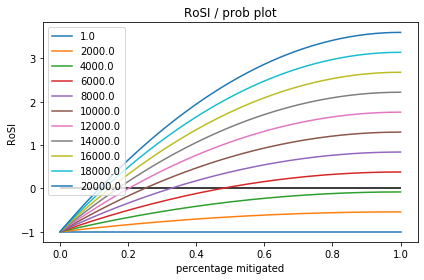

In [6]:
parties = np.linspace(0, 20000, 11)
parties[0] = 1.0

for p in parties:

    solution_cost = cost(2400000, 8160, p)

    probabilities = 1 - np.linspace(0, 1, 200)
    RoSIs = [
        RoSI(ALE(237*1.0/770000, 1.00*1800000, 1), 
             ALE(237*(1-prob)/770000, (1-prob)*1800000, 1), 
             solution_cost
        ) for prob in probabilities
    ]

    plt.plot(probabilities, RoSIs, label=f"{p}")
plt.xlabel("percentage mitigated")
plt.ylabel("RoSI")
plt.title("RoSI / prob plot")
plt.tight_layout()

plt.hlines([0], probabilities[0], probabilities[-1], colors="black")
plt.legend()
# plt.savefig("rosi_years.png", dpi=400)

In [7]:
ALE_0 = ALE(237*1.00/770000, 1.00*1800000, 1)
ALE_s = ALE(237*0.95/770000, 0.95*1800000, 1)
solution_cost = cost(2400000, 8160, 1)
companies = solution_cost / (ALE_0 - ALE_s)

companies

44581.08117854948